In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Path variable

# Load the data
df = pd.read_csv(r"C:\Users\tdhoble\Downloads\financial_distress_prediction.csv")

# First 5 columns
print(df.head())
df.drop('Unnamed: 0', axis=1, inplace=True)

# Independent variables
X = df.drop('SeriousDlqin2yrs', axis=1)

# Dependent variable
y = df['SeriousDlqin2yrs']

# Check the value counts
count = y.value_counts()

# Split the data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


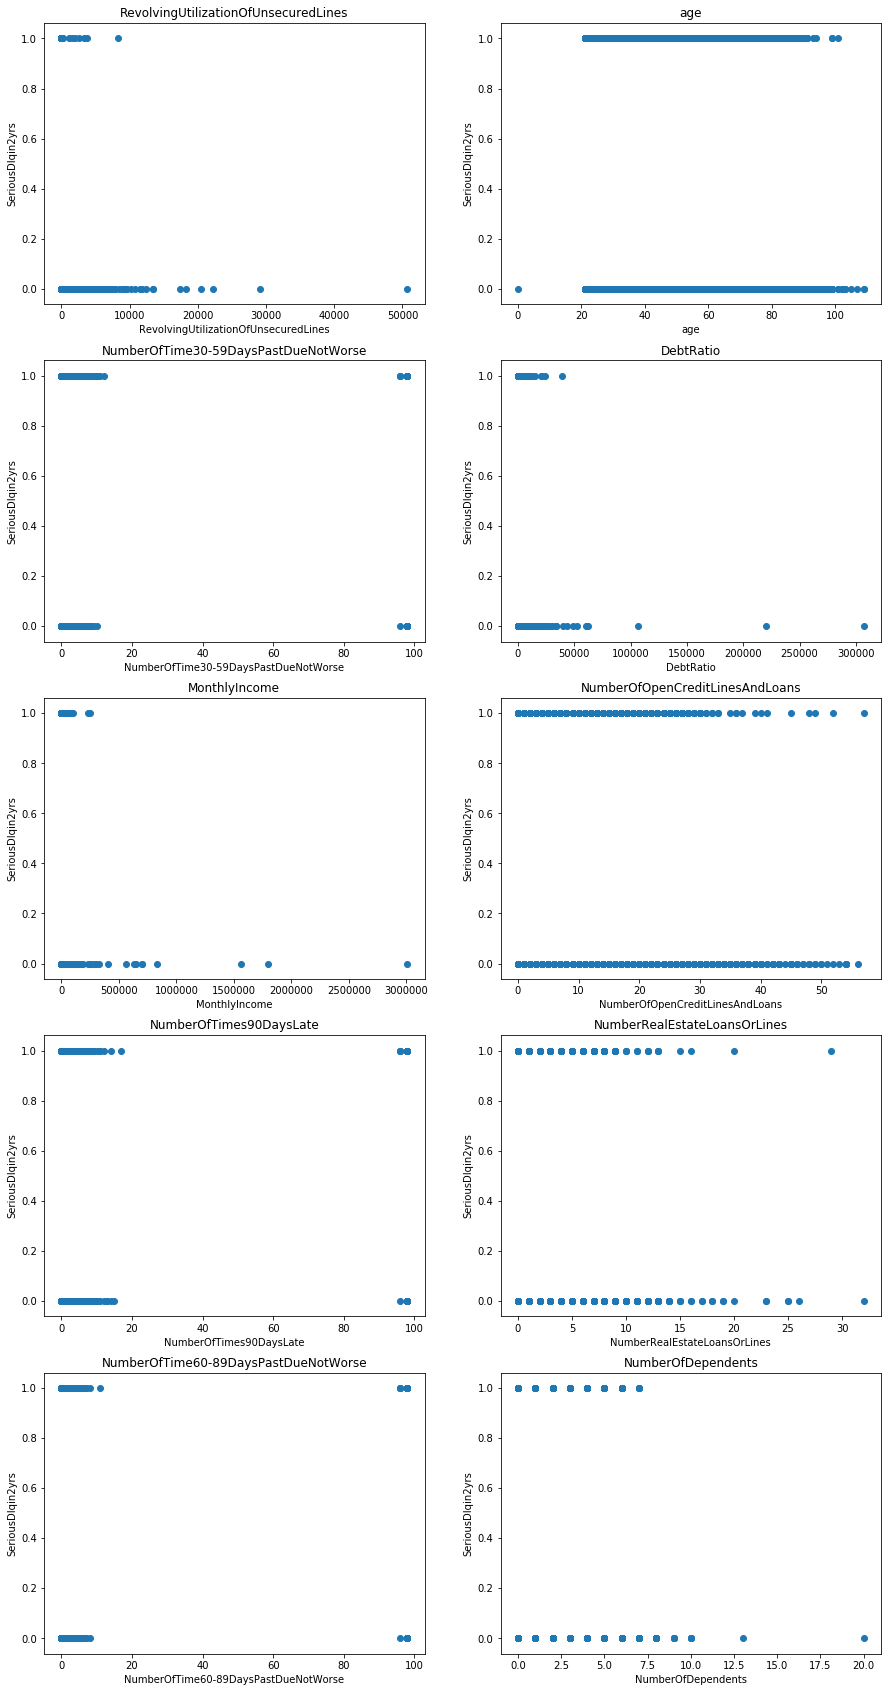

In [4]:
# save list of all the columns of X in cols
cols = X_train.columns.tolist()
print(cols)

# create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))

# nested for loops to iterate over all the features and plot the same
for i in range(5):
    for j in range(2):
        col= cols[i * 2 + j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col],y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('SeriousDlqin2yrs')

In [5]:
# Check for null values
print("X_train Null  data: \n",X_train.isnull().sum())
print("X_test Null  data: \n",X_test.isnull().sum())

# Filling the missing values for columns in training data set
X_train['MonthlyIncome'].fillna(value=X_train['MonthlyIncome'].median(), inplace=True)
X_train['NumberOfDependents'].fillna(value=X_train['NumberOfDependents'].median(), inplace=True)

# Filling the missing values for columns in testing data set
X_test['MonthlyIncome'].fillna(value=X_test['MonthlyIncome'].median(), inplace=True)
X_test['NumberOfDependents'].fillna(value=X_test['NumberOfDependents'].median(), inplace=True)

# Checking for null values
print("X_train",X_train.isnull().sum().sum())
print("X_test",X_test.isnull().sum().sum())

X_train Null  data: 
 RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20727
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2722
dtype: int64
X_test Null  data: 
 RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           9004
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1202
dtype: int64
X_train 0
X_test 0


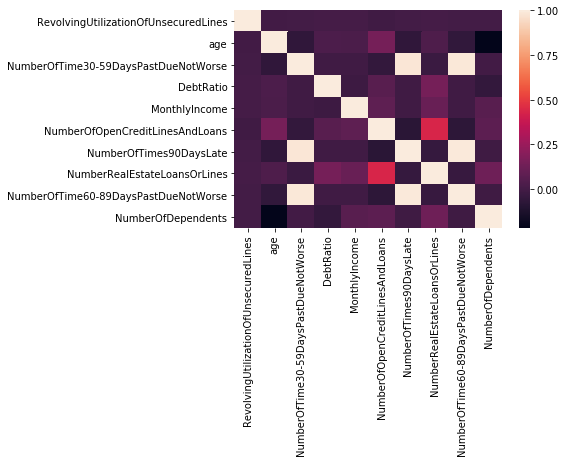

In [6]:
# Correlation matrix for training set
corr = X_train.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(corr)

# drop the columns which are correlated amongst each other except one
X_train.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'], axis=1, inplace=True)
X_test.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'], axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Import Logistic regression model and accuracy score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Instantiate the model in a variable in log_reg
log_reg = LogisticRegression()

# Fit the model on training data
log_reg.fit(X_train, y_train)

# Predictions of the training dataset
y_pred = log_reg.predict(X_test)

# accuracy score
accuracy = accuracy_score(y_pred, y_test)
print("accuracy", accuracy)

accuracy 0.9351111111111111


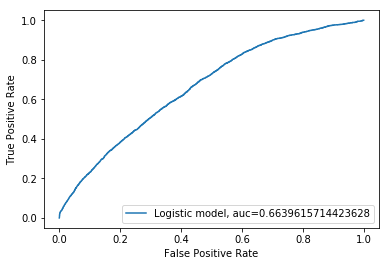

Confusion_matrix
 [[42031    39]
 [ 2881    49]]
Classification_report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     42070
           1       0.56      0.02      0.03      2930

   micro avg       0.94      0.94      0.94     45000
   macro avg       0.75      0.51      0.50     45000
weighted avg       0.91      0.94      0.91     45000



In [9]:
# Import all the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

# Plot the auc-roc curve
score = roc_auc_score(y_pred , y_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Evaluation parameters for the model
f1 = f1_score(y_test, log_reg.predict(X_test))
precision = precision_score(y_test, log_reg.predict(X_test))
recall = recall_score(y_test, log_reg.predict(X_test))
roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, log_reg.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64


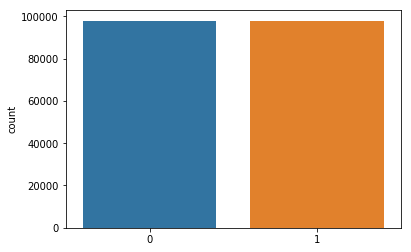

In [10]:
# Import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE

# Check value counts of target variable for data imbalance
count = y.value_counts()
print(count)

# Instantiate smote
smote = SMOTE(random_state=9)

# Fit Smote on training set
X_sample, y_sample = smote.fit_sample(X_train, y_train)

# Check for count of class
sns.countplot(y_sample)


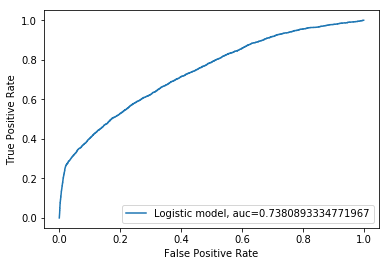

Confusion matrix
 [[28641 13429]
 [ 1044  1886]]
Classification_report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     42070
           1       0.12      0.64      0.21      2930

   micro avg       0.68      0.68      0.68     45000
   macro avg       0.54      0.66      0.50     45000
weighted avg       0.91      0.68      0.76     45000



In [11]:
# Fit logistic regresion model on X_sample and y_sample
log_reg.fit(X_sample, y_sample)

# Store the result predicted in y_pred
y_pred = log_reg.predict(X_test)

# Store the auc_roc score
score = roc_auc_score(y_pred , y_test)

# Store the probablity of any class
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Plot the auc_roc_graph
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Print f1_score,Precision_score,recall_score,roc_auc_score and confusion matrix
f1 = f1_score(y_test, log_reg.predict(X_test))
precision = precision_score(y_test, log_reg.predict(X_test))
recall = recall_score(y_test, log_reg.predict(X_test))
# roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print('Confusion matrix' + '\n' ,confusion_matrix(y_test, log_reg.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

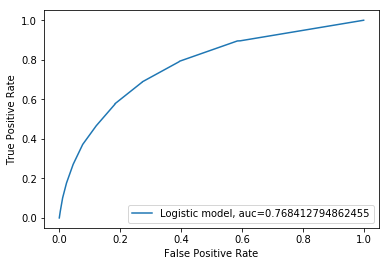

Confusion matrix
 [[38850  3220]
 [ 1843  1087]]
Classification_report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     42070
           1       0.25      0.37      0.30      2930

   micro avg       0.89      0.89      0.89     45000
   macro avg       0.60      0.65      0.62     45000
weighted avg       0.91      0.89      0.90     45000



In [12]:
# Import RandomForestClassifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForrestClassifier to a variable rf.
rf = RandomForestClassifier(random_state = 9)

# Fit the model on training data.
rf.fit(X_sample, y_sample)

# Store the result predicted in y_pred
y_pred = rf.predict(X_test)

# Store the auc_roc score
score = roc_auc_score(y_pred , y_test)

# Store the probablity of any class
y_pred_proba = rf.predict_proba(X_test)[:,1]

# Plot the auc_roc_graph
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Print f1_score,Precision_score,recall_score,roc_auc_score and confusion matrix
f1 = f1_score(y_test, rf.predict(X_test))
precision = precision_score(y_test, rf.predict(X_test))
recall = recall_score(y_test, rf.predict(X_test))
# roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print('Confusion matrix' + '\n' ,confusion_matrix(y_test, rf.predict(X_test)))
print('Classification_report' + '\n' + classification_report(y_test,y_pred))